
Missing Values After Cleaning:
id                  0
key                 0
action              0
rhythm              0
dwell_time          0
flight_time         0
up_down_time        0
session_duration    0
user_id             0
timestamp           0
dtype: int64

Cleaned Data Preview:
          id        key   action  rhythm  dwell_time  flight_time  \
3067  3067.0          1  release     0.0    0.152503     1.788202   
3068  3068.0  Key.enter  release     0.0    0.084759     0.000000   
3069  3069.0          b  release     0.0    0.055941     0.108629   
3070  3070.0          z  release     0.0    0.150086     0.019156   
3071  3071.0          t  release     0.0    0.067397     0.154120   

      up_down_time  session_duration  user_id                        timestamp  
3067      1.788202              -1.0      1.0 2025-01-15 10:08:05.783485+00:00  
3068      0.000000              -1.0      1.0 2025-01-15 10:08:05.793162+00:00  
3069      0.108629              -1.0      1.0 2025-01-

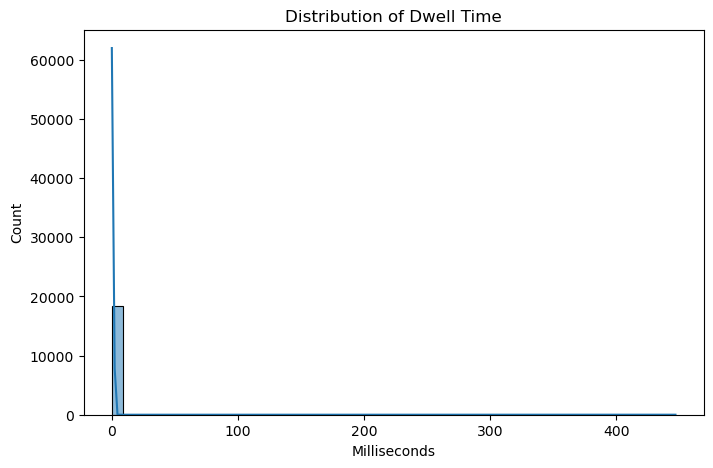

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("logger_keystrokelog_modified.csv")

# Drop completely empty rows
df.dropna(how='all', inplace=True)

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop rows with critical missing values (you can adjust this)
df.dropna(subset=['key', 'user_id', 'timestamp'], inplace=True)

# Optional: Fill missing timing-related features (or keep NaNs for now)
timing_features = ['dwell_time', 'flight_time', 'up_down_time', 'session_duration']
df[timing_features] = df[timing_features].fillna(-1)

# Summary of missing data
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# Preview cleaned data
print("\nCleaned Data Preview:")
print(df.head())

# Save cleaned dataset
df.to_csv("cleaned_logger_keystrokelog.csv", index=False)
print("\n✅ Cleaned dataset saved as 'cleaned_logger_keystrokelog.csv'")

# Optional: Visualize one of the key features
plt.figure(figsize=(8, 5))
sns.histplot(df['dwell_time'][df['dwell_time'] > 0], bins=50, kde=True)
plt.title("Distribution of Dwell Time")
plt.xlabel("Milliseconds")
plt.show()


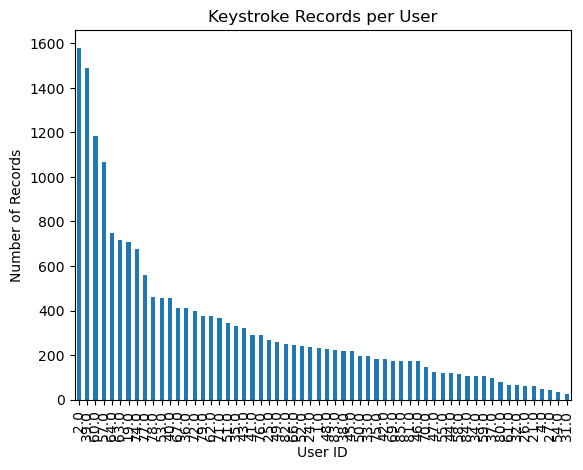

In [2]:
# Records per user
df['user_id'].value_counts().plot(kind='bar', title="Keystroke Records per User")
plt.xlabel("User ID")
plt.ylabel("Number of Records")
plt.show()


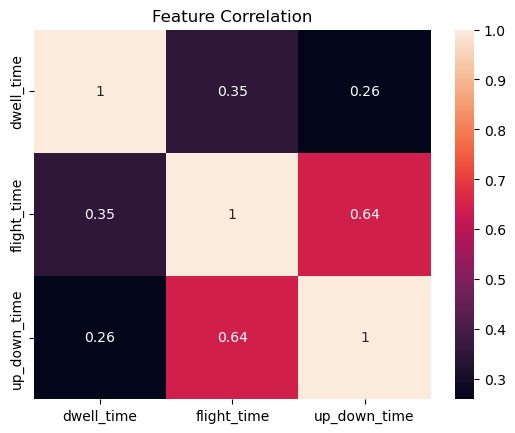

In [3]:
sns.heatmap(df[['dwell_time', 'flight_time', 'up_down_time']].corr(), annot=True)
plt.title("Feature Correlation")
plt.show()
